In [19]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.datasets import make_blobs
import torch

In [20]:
x_list = [1, 2, 3]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1, 2, 3])

In [21]:
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [22]:
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [23]:
eye_tensor = torch.eye(7,3)
eye_tensor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [24]:
tensor1 = torch.tensor([
    [1,2],
    [3,4]
        ])

tensor2 = torch.tensor([
    [7,8],
    [9,10]
        ])

tensor1 + tensor2

tensor([[ 8, 10],
        [12, 14]])

In [25]:
tensor1@tensor2

tensor([[25, 28],
        [57, 64]])

In [26]:
torch.cat([tensor1, tensor2], dim = 0)

tensor([[ 1,  2],
        [ 3,  4],
        [ 7,  8],
        [ 9, 10]])

In [27]:
x_numpy = tensor1.numpy()
x_numpy

array([[1, 2],
       [3, 4]], dtype=int64)

In [28]:
tensor1.tolist()

[[1, 2], [3, 4]]

In [29]:
tensor3 = torch.tensor([3])
tensor3.item()

3

In [30]:
import torch.nn as nn

In [94]:
#n - кол-во входов, m - кол-во выходов
n = 5
m = 3
linear_layer = nn.Linear(n, m, bias = True)

In [95]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [96]:
exp_tensor = torch.Tensor(1, 5)
exp_tensor.shape

torch.Size([1, 5])

In [99]:
linear_layer(exp_tensor)

tensor([[ 0.4102,  0.0148, -0.3695]], grad_fn=<AddmmBackward0>)

In [98]:
#инициализированны начальные значения весов
linear_layer.weight.shape

torch.Size([3, 5])

**LINEAR LAYER выражает преобразование  XW^t+ b, weight*X + bias**

In [78]:
linear_layer.bias

Parameter containing:
tensor([-0.4421, -0.4306, -0.2815], requires_grad=True)

In [35]:
activation = nn.Tanh()

In [50]:
tensor1

tensor([[1, 2],
        [3, 4]])

In [133]:
mass = [1, 2, 3, 4, 5, 6]

In [134]:
ans = ['penis' if (x%2 == 1) else 'vagina' for x in mass ]
ans

['penis', 'vagina', 'penis', 'vagina', 'penis', 'vagina']

In [148]:
res = [x**2 for x in mass]
res

[1, 4, 9, 16, 25, 36]

In [51]:
activation(tensor1)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

In [59]:
random_input = torch.rand(5)
x = linear_layer(random_input)
output = activation(x)
output

tensor([-0.4567,  0.4557, -0.5273], grad_fn=<TanhBackward0>)

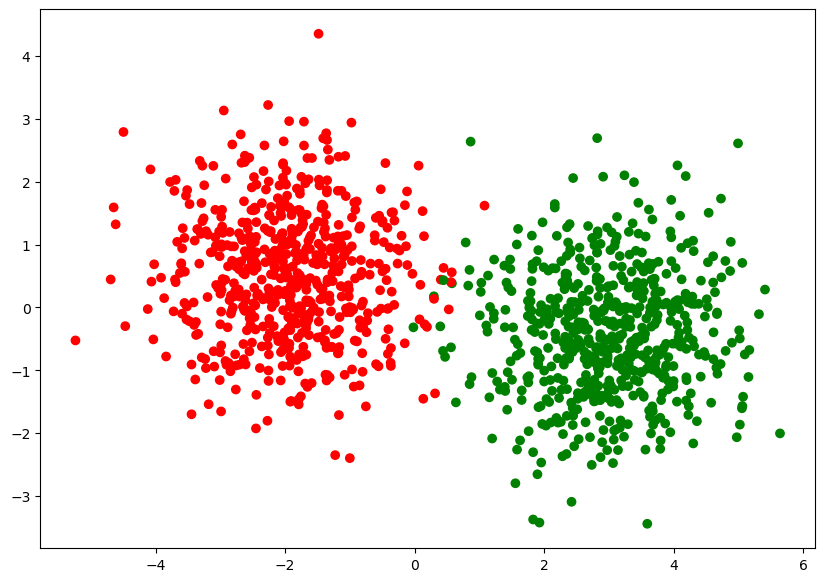

In [87]:
X, y = make_blobs(n_samples= 1200, centers = [[-2, 0.5], [3, -0.5]], cluster_std = 1, random_state= 42)
#X - координаты точек, y = 1 или 0 принадлежность центру

colors = ('red', 'green')
colored_y = np.zeros(y.size, dtype = str)

for i, cl in enumerate([0, 1]):
    colored_y[y.ravel() == cl] = str(colors[cl])

plt.figure(figsize= (10, 7))
plt.scatter(X[:, 0], X[:, 1], c = colored_y)
plt.show()

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 200)

In [252]:
reg = LogisticRegression()

In [260]:
reg.fit(X_train.numpy(), y_train.numpy().ravel())

LogisticRegression()

In [264]:
reg.coef_

array([[ 3.53911325, -0.55228282]])

In [265]:
reg.intercept_

array([-1.85905383])

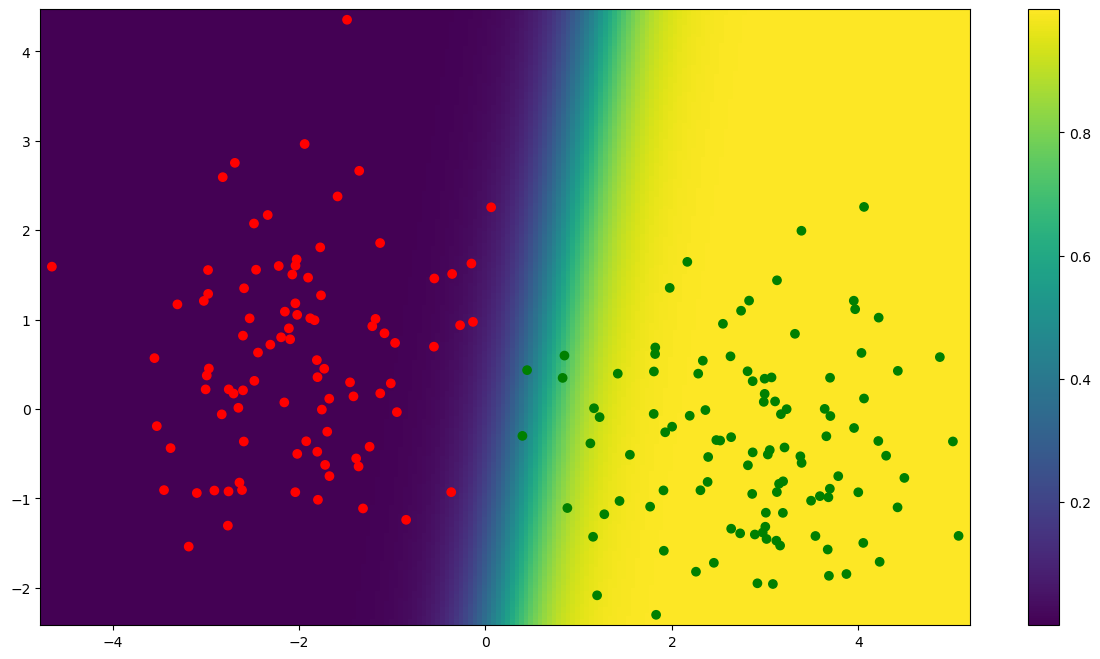

In [316]:
plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))


Z = reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
# Z = (Z>0.4).astype(int)
plt.pcolormesh(xx, yy, Z)
plt.colorbar()
colored_y = np.zeros(y_test.size, dtype=str)
for i in [0,1]:
    colored_y[y_test.ravel() == i] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

In [108]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(2,2)
        self.act1 = nn.Sigmoid()
        
        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x

In [109]:
model = Net()

In [129]:
nn_predictions = model(torch.FloatTensor(X_train))
nn_predictions = nn_predictions.tolist()

In [130]:
nn_predictions

[[0.23551565408706665],
 [0.22812657058238983],
 [0.27219071984291077],
 [0.25162068009376526],
 [0.25806179642677307],
 [0.2609298825263977],
 [0.24636094272136688],
 [0.25533410906791687],
 [0.25172320008277893],
 [0.23195530474185944],
 [0.2495318204164505],
 [0.27112942934036255],
 [0.25029489398002625],
 [0.26295262575149536],
 [0.24787990748882294],
 [0.2510150969028473],
 [0.22663262486457825],
 [0.24950453639030457],
 [0.259927898645401],
 [0.23750421404838562],
 [0.23368744552135468],
 [0.22589808702468872],
 [0.2457846999168396],
 [0.2745029032230377],
 [0.2683156430721283],
 [0.26058632135391235],
 [0.2572590708732605],
 [0.26372089982032776],
 [0.24797160923480988],
 [0.24076326191425323],
 [0.2661781311035156],
 [0.24676865339279175],
 [0.230880469083786],
 [0.259021133184433],
 [0.25131240487098694],
 [0.2671259939670563],
 [0.2487196922302246],
 [0.27987274527549744],
 [0.2508973181247711],
 [0.2686576843261719],
 [0.2711474299430847],
 [0.2412712126970291],
 [0.23578314

In [131]:
nn_predictions = np.array([int(x[0] > 0.5) for x in nn_predictions])

In [132]:
nn_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

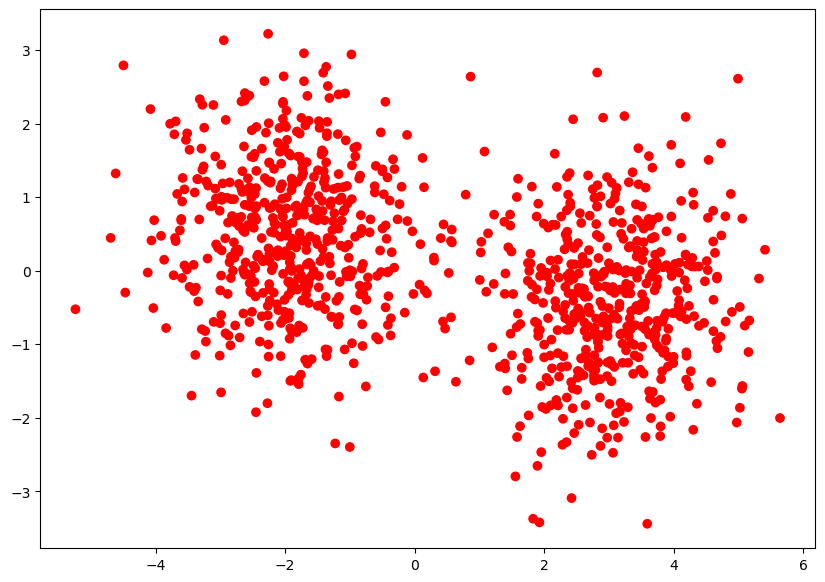

In [136]:
colors = ('red', 'green')
colored_y = np.zeros(len(nn_predictions), dtype = str)

for i in [0, 1]:
    colored_y[nn_predictions == i] = str(colors[i])
    
plt.figure(figsize= (10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c = colored_y)
plt.show()

In [138]:
import tqdm
from tqdm.auto import tqdm

In [140]:
def train(model, X, y, criterion, optimizer, num_epoch):
    for t in tqdm(range(num_epoch)):
        #получим предсказания
        y_pred = model(X)
        
        #посчитаем лосс
        loss = criterion(y_pred, y)
        
        #вычислим градиент
        loss.backward()
        
        #выполним шаг
        optimizer.step()
        
        #обнулим градиент перед следуюшим шагом
        optimizer.zero_grad()
        
    return model

In [181]:
model = Net()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [185]:
X_train =torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) #изменение размерности с 1000 до (1000, 1)

model = train(model, X_train, y_train, criterion, optimizer, 10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [186]:
with torch.no_grad():
    nn_predictions = model(torch.FloatTensor(X_test))
    nn_predictions = nn_predictions.tolist()
    
nn_predictions = np.array([int(x[0] > 0.5) for x in nn_predictions])

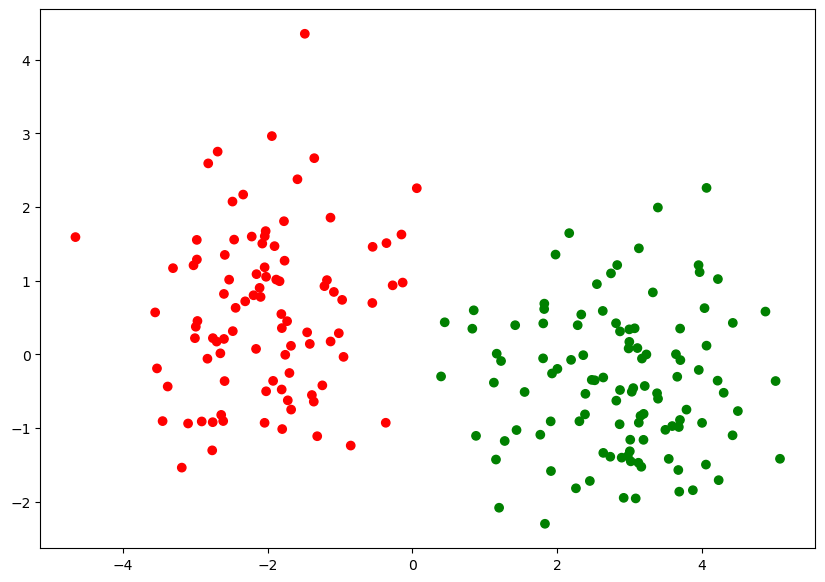

In [187]:
colors = ('red', 'green')
colored_y = np.zeros(len(nn_predictions), dtype = str)

for i in [0, 1]:
    colored_y[nn_predictions == i] = str(colors[i])
    
plt.figure(figsize= (10, 7))
plt.scatter(X_test[:, 0], X_test[:, 1], c = colored_y)
plt.show()

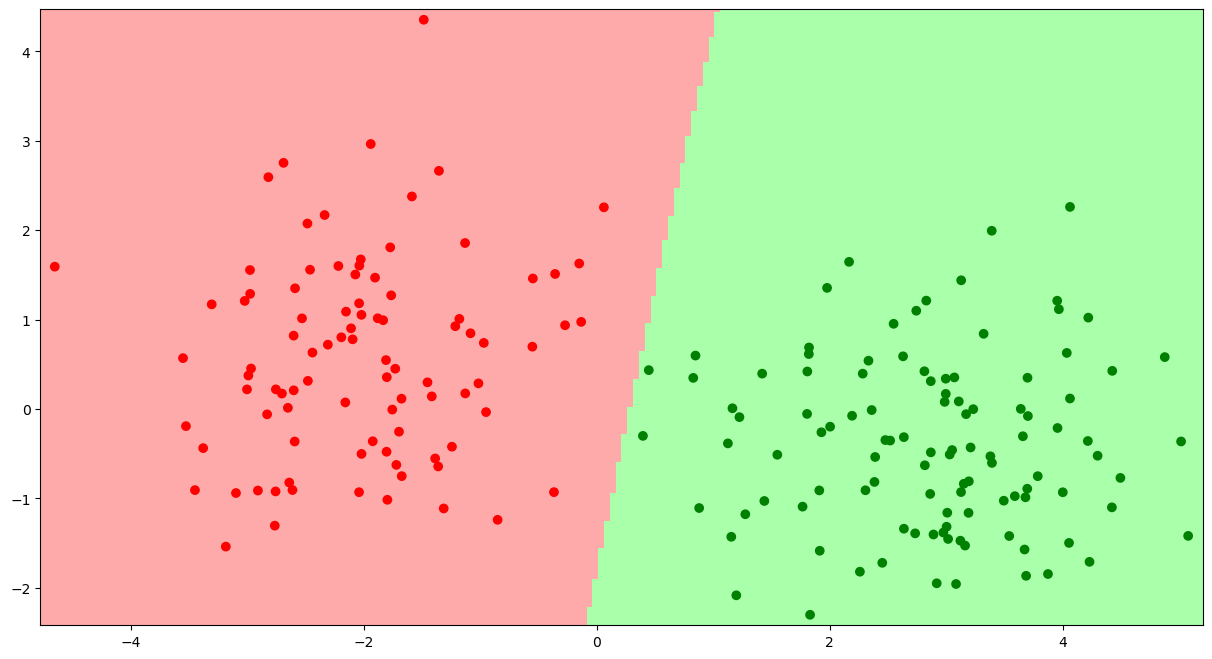

In [191]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

In [239]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

In [240]:
import tqdm
from tqdm.auto import tqdm

def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

In [241]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [248]:
model = train_stochastic(model, train_loader, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

curr_loss 0.20370984263718128
curr_loss 0.2038929583504796
curr_loss 0.20401832927018404
curr_loss 0.2029531290754676
curr_loss 0.2034105295315385
curr_loss 0.2026338605210185
curr_loss 0.20318775344640017
curr_loss 0.20287123881280422
curr_loss 0.2025040565058589
curr_loss 0.20314957946538925
curr_loss 0.2027251599356532
curr_loss 0.20215620007365942
curr_loss 0.20165044721215963
curr_loss 0.2023676075041294
curr_loss 0.2017016839236021
curr_loss 0.20170532260090113
curr_loss 0.20196350663900375
curr_loss 0.20155478361994028
curr_loss 0.20164580456912518
curr_loss 0.20108239725232124
curr_loss 0.20120203960686922
curr_loss 0.2012774422764778
curr_loss 0.20060956105589867
curr_loss 0.2012728750705719
curr_loss 0.2004852592945099
curr_loss 0.20027470123022795
curr_loss 0.20041100680828094
curr_loss 0.20017859898507595
curr_loss 0.19960608053952456
curr_loss 0.20003992691636086
curr_loss 0.19997471943497658
curr_loss 0.19981122389435768
curr_loss 0.19992908369749784
curr_loss 0.199447991

curr_loss 0.17189070116728544
curr_loss 0.17118063382804394
curr_loss 0.1725464928895235
curr_loss 0.1726845195516944
curr_loss 0.1709809647873044
curr_loss 0.17127048410475254
curr_loss 0.17083372548222542
curr_loss 0.17077095061540604
curr_loss 0.17086863797158003
curr_loss 0.17070103250443935
curr_loss 0.17161122988909483
curr_loss 0.17026757635176182
curr_loss 0.1704344805330038
curr_loss 0.1700119161978364
curr_loss 0.1700263936072588
curr_loss 0.17006200551986694
curr_loss 0.17128650285303593
curr_loss 0.17000781930983067
curr_loss 0.16978961881250143
curr_loss 0.16944974102079868
curr_loss 0.16981648188084364
curr_loss 0.16944111790508032
curr_loss 0.16959041636437178
curr_loss 0.16923017147928476
curr_loss 0.1692159129306674
curr_loss 0.16946289781481028
curr_loss 0.16940409876406193
curr_loss 0.1694656042382121
curr_loss 0.16901283897459507
curr_loss 0.16909539606422186
curr_loss 0.16890928614884615
curr_loss 0.1687056515365839
curr_loss 0.16893947683274746
curr_loss 0.1684264

curr_loss 0.14780365116894245
curr_loss 0.1476459363475442
curr_loss 0.14825699292123318
curr_loss 0.14802309032529593
curr_loss 0.14756548777222633
curr_loss 0.14753365516662598
curr_loss 0.1496438616886735
curr_loss 0.1471700994297862
curr_loss 0.14763859007507563
curr_loss 0.14728996809571981
curr_loss 0.14795825583860278
curr_loss 0.14723136089742184
curr_loss 0.1470045242458582
curr_loss 0.14731186302378774
curr_loss 0.14656964503228664
curr_loss 0.14689185936003923
curr_loss 0.14738655742257833
curr_loss 0.14616758096963167
curr_loss 0.14672512374818325
curr_loss 0.14709270186722279
curr_loss 0.14724295679479837
curr_loss 0.14659401588141918
curr_loss 0.1464103190228343
curr_loss 0.1464025480672717
curr_loss 0.14646276040002704
curr_loss 0.1459315149113536
curr_loss 0.14592137839645147
curr_loss 0.14577519241720438
curr_loss 0.14602707140147686
curr_loss 0.14536105655133724
curr_loss 0.14657302759587765
curr_loss 0.14584583695977926
curr_loss 0.14528602734208107
curr_loss 0.14543

curr_loss 0.13020346965640783
curr_loss 0.12940009403973818
curr_loss 0.1297230813652277
curr_loss 0.13012321665883064
curr_loss 0.12973266607150435
curr_loss 0.1296561541967094
curr_loss 0.129392821341753
curr_loss 0.12904158094897866
curr_loss 0.12921333592385054
curr_loss 0.12928855884820223
curr_loss 0.1290246406570077
curr_loss 0.12885911017656326
curr_loss 0.12905355170369148
curr_loss 0.1296996851451695
curr_loss 0.12886126106604934
curr_loss 0.12883005570620298
curr_loss 0.12892594607546926
curr_loss 0.12885281024500728
curr_loss 0.1292054457589984
curr_loss 0.12976018618792295
curr_loss 0.12859545554965734
curr_loss 0.12831677356734872
curr_loss 0.12837778171524405
curr_loss 0.12848173500970006
curr_loss 0.12829341180622578
curr_loss 0.1284305895678699
curr_loss 0.12852848088368773
curr_loss 0.1280671083368361
curr_loss 0.12833963753655553
curr_loss 0.12843897938728333
curr_loss 0.12846240401268005
curr_loss 0.12871856009587646
curr_loss 0.1279726172797382
curr_loss 0.12767172

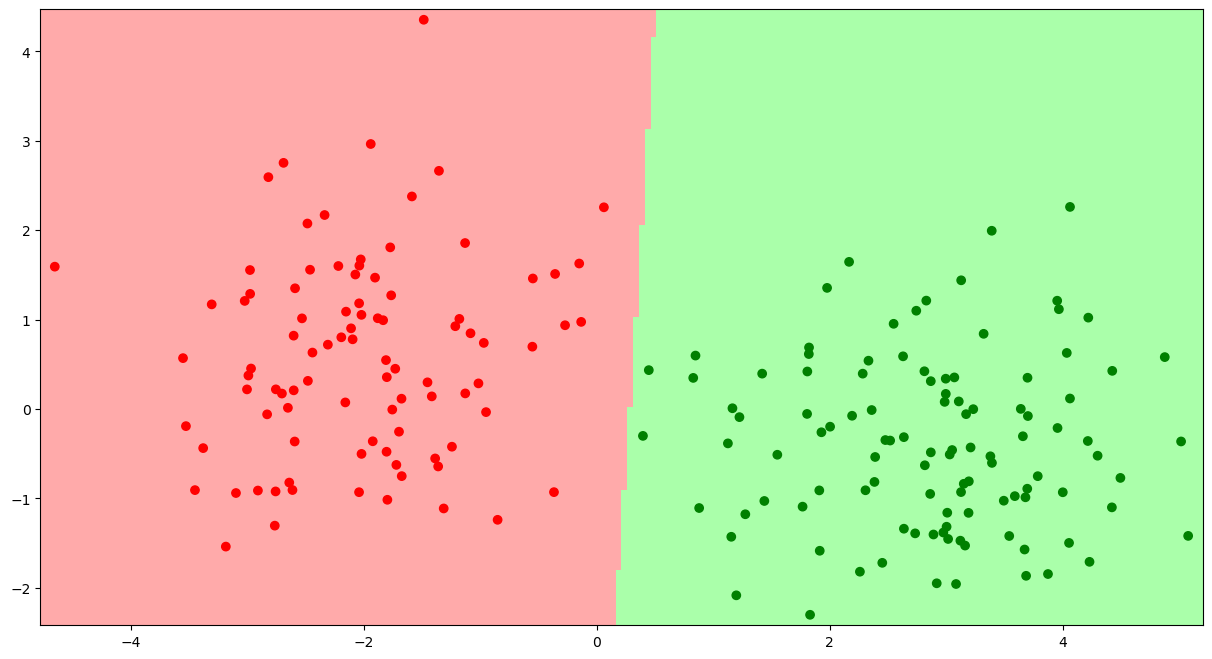

In [249]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);